# Лабораторная работа №1

Бирюков В. В.

Группа: М8О-407Б-19

## Обработка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Датасет [Concrete Compressive Strength](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength)

In [2]:
data = pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
data.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Категориальные признаки отсутствуют

In [5]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Пропуски в данных отсутствуют

In [6]:
data.columns=['Cement','Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
              'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

Переименуем столбцы для удобства

In [7]:
data.head(10)

,Cement,Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


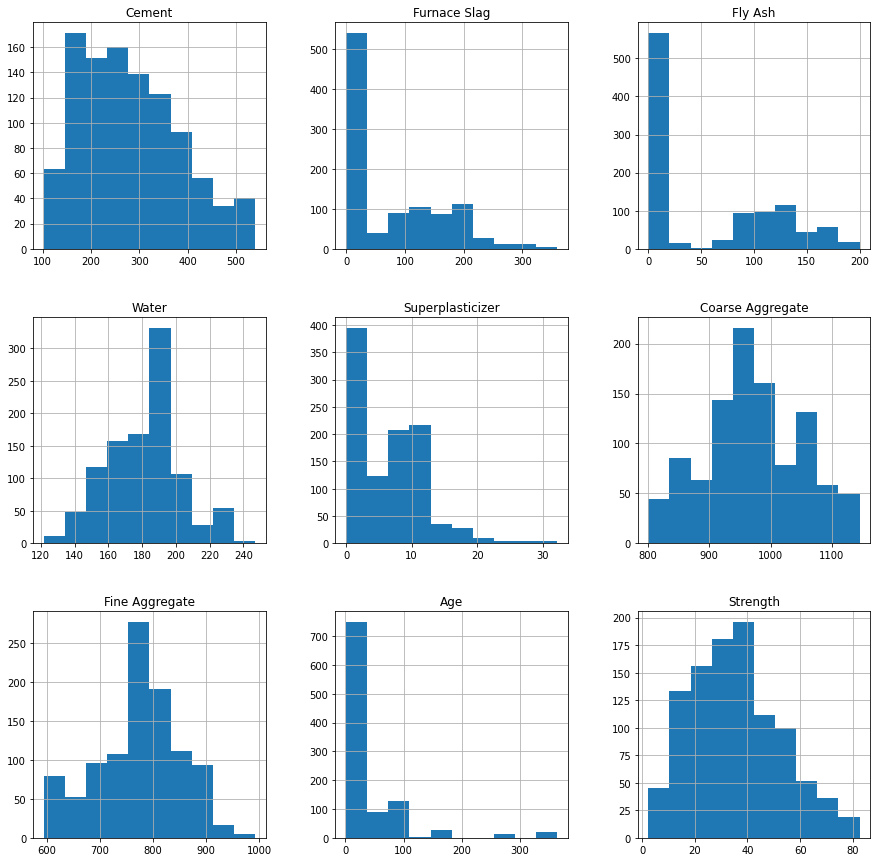

In [8]:
data.hist(data.columns, layout=(3, 3), figsize=(15, 15))
pass

Распределения признаков. Имеется много элементов с Furnace Slag, Fly Ash, Superplasticizer равными 0, или Age равным 1, но так как их больше половины, не будем обрабатывать их как выбросы

In [9]:
data.describe()

,Cement,Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [10]:
data.corr()

,Cement,Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


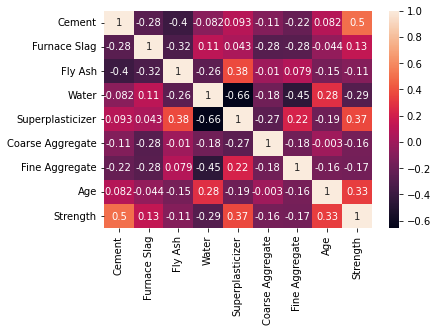

In [11]:
sns.heatmap(data.corr(), annot=True)
pass

Мультиколлинеарность выражена слабо

In [12]:
data.corrwith(data['Strength']).sort_values()

Water              -0.289613
Fine Aggregate     -0.167249
Coarse Aggregate   -0.164928
Fly Ash            -0.105753
Furnace Slag        0.134824
Age                 0.328877
Superplasticizer    0.366102
Cement              0.497833
Strength            1.000000
dtype: float64

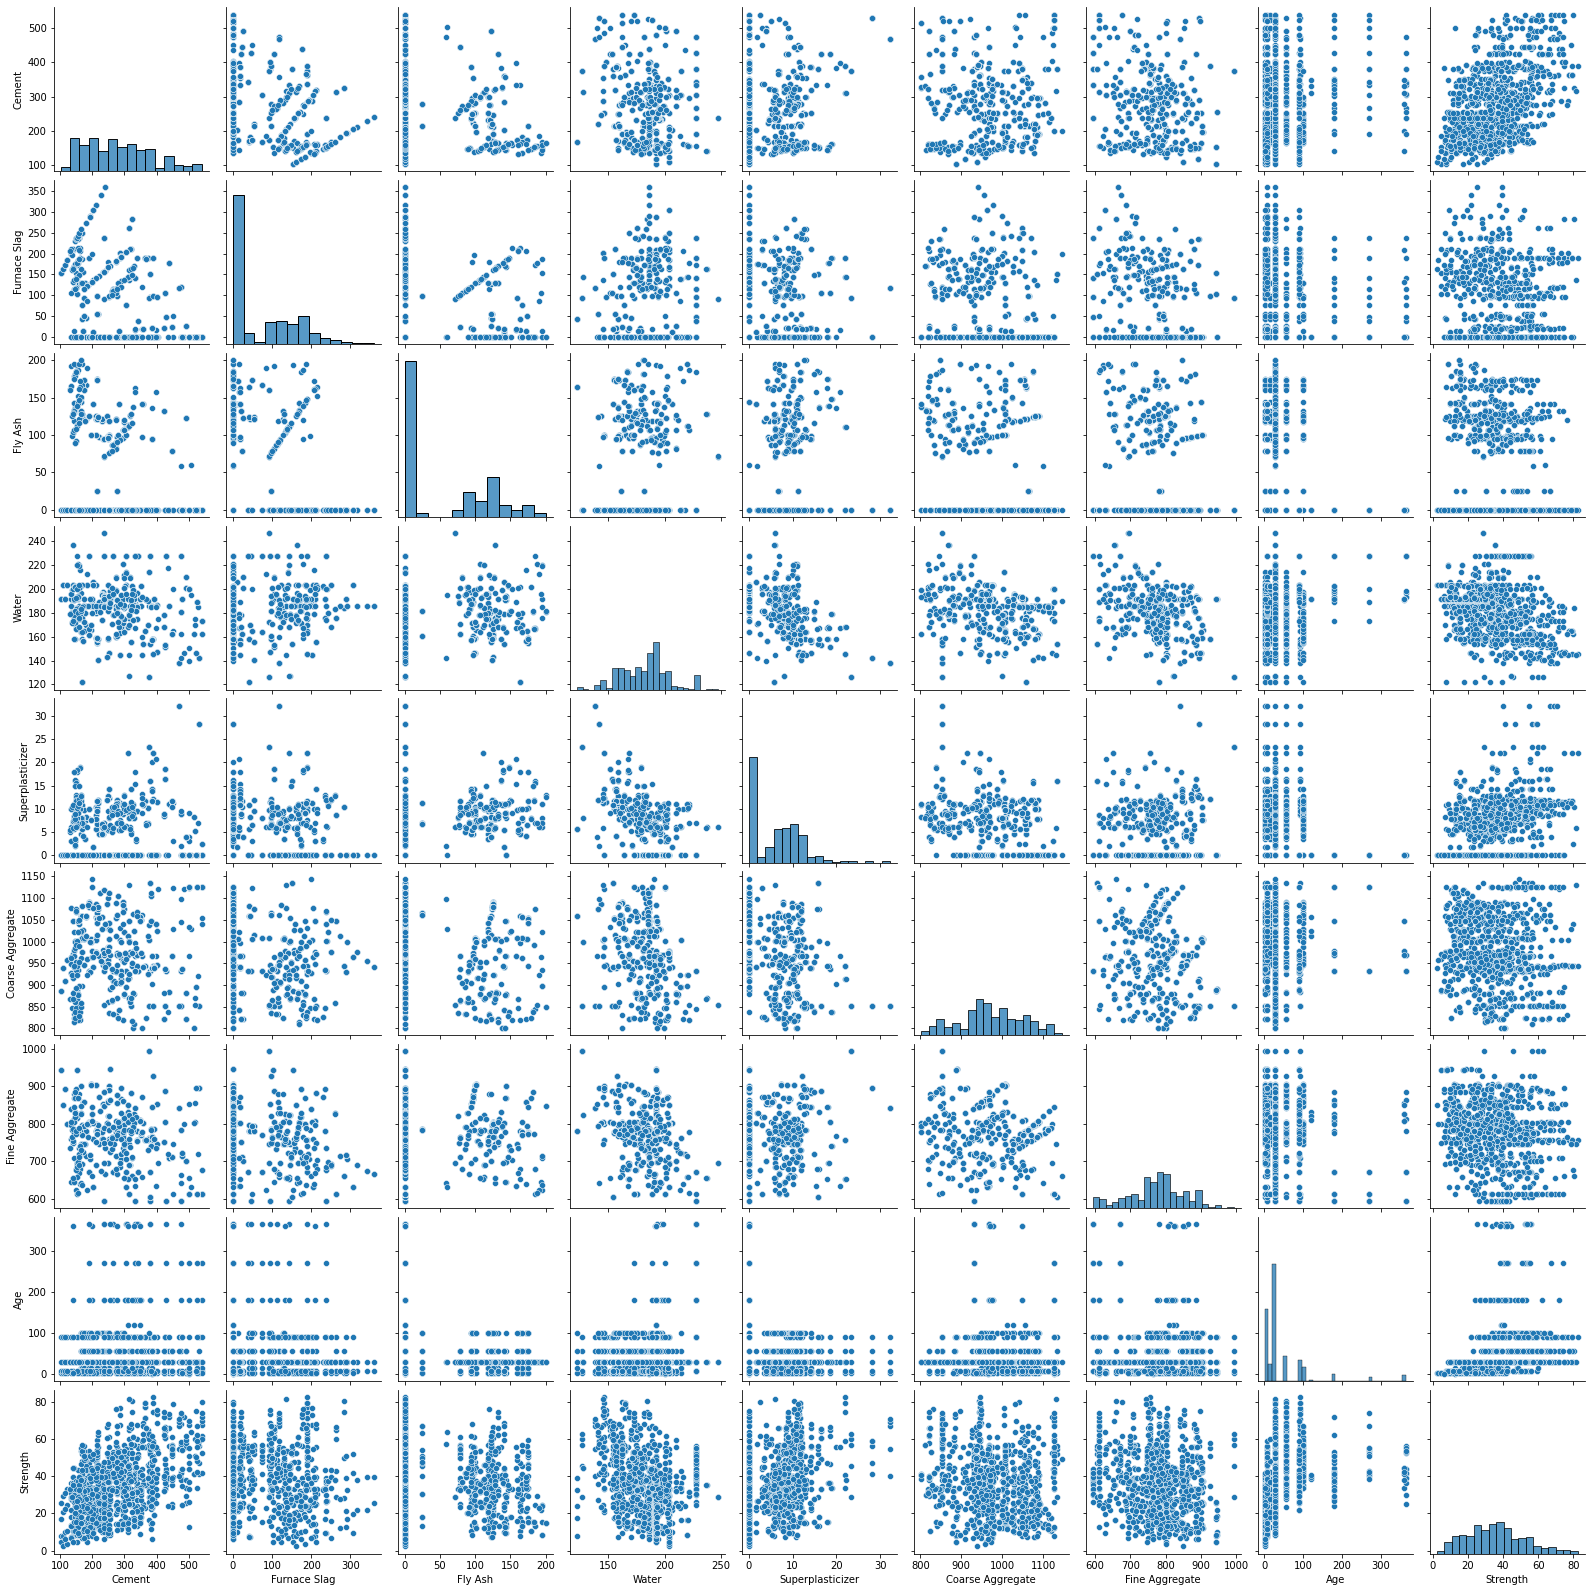

In [13]:
sns.pairplot(data=data)
pass

Попарная визуализация признаков

## Обучение модели

In [14]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, r2_score

In [15]:
def scores(model, data, labels):
    pred = model.predict(data)
    print("Max error:", max_error(labels, pred))
    print("MAE:", mean_absolute_error(labels, pred))
    print("MSE:", mean_squared_error(labels, pred))
    print("R^2:", r2_score(labels, pred))
    fig = plt.figure(figsize=(6, 6))
    fig.add_subplot(111, aspect='equal')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.axline((0, 0), (1, 1), ls='--', c='grey')
    plt.scatter(labels, pred, marker='o')
    plt.show()

In [16]:
x = data.drop(columns = 'Strength').to_numpy()
y = data['Strength'].to_numpy()
train_data, test_data, train_labels, test_labels = train_test_split(x, y, train_size=0.8, random_state=1)

### Решающее дерево

Max error: 34.06700916
MAE: 4.933236959170912
MSE: 61.82626667738132
R^2: 0.7628417693195335


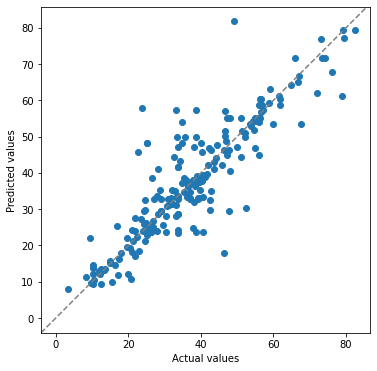

In [17]:
tree = DecisionTreeRegressor()
tree.fit(train_data, train_labels)
scores(tree, test_data, test_labels)

In [18]:
tree_cv = GridSearchCV(DecisionTreeRegressor(), 
                       {'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"], 
                        'max_depth': [5, 10, 20, None], 
                        'min_samples_leaf': [1, 5, 50, 100],
                        'splitter' : ['best', 'random']})
tree_cv.fit(train_data, train_labels)
print(tree_cv.best_params_, tree_cv.best_score_, sep='\n')

{'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 1, 'splitter': 'random'}
0.8282619083096673


Max error: 37.004176920000006
MAE: 4.486582421046719
MSE: 52.75863779756907
R^2: 0.797624118912544


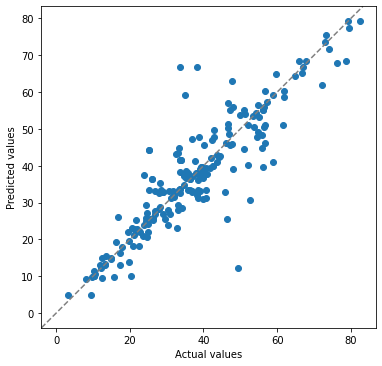

In [19]:
scores(tree_cv.best_estimator_, test_data, test_labels)

Даже одно решающее дерево предсказывает относительно неплохо, за исключением нескольких выбивающихся точек. Средняя ошибка - 4.5 МПа, что составляет ~5% от максимального значения.

### Случайный лес

Max error: 23.716449673054566
MAE: 3.432820535632375
MSE: 26.392229120971958
R^2: 0.8987625373742152


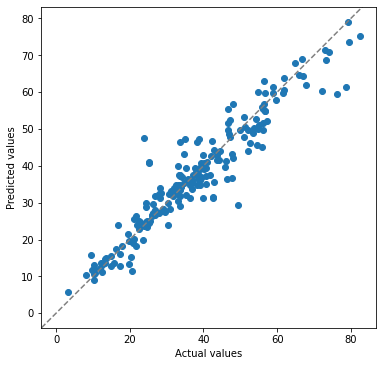

In [20]:
forest = RandomForestRegressor()
forest.fit(train_data, train_labels)
scores(forest, test_data, test_labels)

In [21]:
forest_cv = GridSearchCV(RandomForestRegressor(), 
                         {'criterion': ["squared_error", "absolute_error", "poisson"],
                          'n_estimators': [50, 100],
                          'max_depth': [10, 100, None], 
                          'min_samples_leaf': [1, 50, 100]})
forest_cv.fit(train_data, train_labels)
print(forest_cv.best_params_, forest_cv.best_score_, sep='\n')

{'criterion': 'absolute_error', 'max_depth': 100, 'min_samples_leaf': 1, 'n_estimators': 50}
0.901689140895272


Max error: 24.247064492879982
MAE: 3.5324255449171638
MSE: 27.339964900349766
R^2: 0.8951271352600514


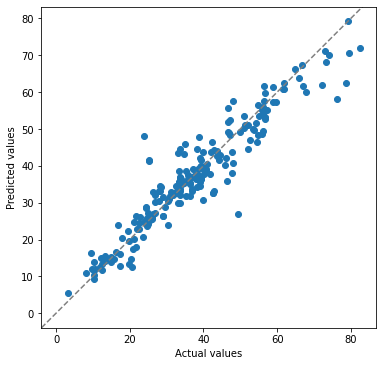

In [22]:
scores(forest_cv.best_estimator_, test_data, test_labels)

Случайный лес ожидаемо справляется еще лучше. Средняя ошибка упала до 3.5 МПа, сильно выбивающихся точек стало значительно меньше